In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dacp.dacp import eigh
from scipy.sparse import csr_matrix

N = 400
a = 0.2
filter_order = 12

def random_values(shape):
    # defines random values from -1 to 1
    return (np.random.rand(*shape) - 1 / 2) * 2


def random_ham(N):
    H = random_values((N, N)) + random_values((N, N)) * 1j
    H = (H.conj().T + H) / (2 * np.sqrt(N))
    return H

def single_random_run(N, a=0.1, filter_order=12):
    ham = random_ham(N)
    eig_true = np.linalg.eigvalsh(ham)
    eig_max = np.max(np.abs(eig_true))
    eig_true = eig_true/eig_max
    ham = ham/eig_max
    eig_dacp = eigh(csr_matrix(ham), window_size=a, eps=0, filter_order=filter_order, random_vectors=1, error_window=0)
    dacp_max = np.max(np.abs(eig_dacp))
    eig_true = eig_true[np.abs(eig_true)<=dacp_max]
    return eig_dacp, eig_true

# eig_dacp, eig_true = single_random_run(N, a=a, filter_order=filter_order)
# rel_errors = np.abs((eig_true-eig_dacp)/eig_true)

92
92


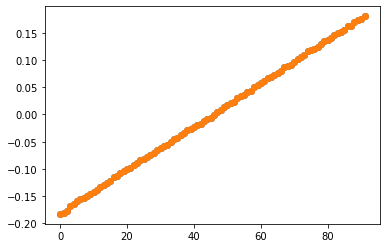

/tmp/ipykernel_5411/1998078852.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(np.abs((eig_true-eig_dacp)/eig_true)))


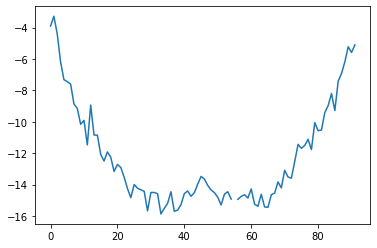

In [4]:
eig_dacp, eig_true = single_random_run(N, a=a, filter_order=filter_order)

print(len(eig_dacp))
print(len(eig_true))
plt.plot(eig_true, 'o')
plt.plot(eig_dacp, 'o')
plt.show()
plt.plot(np.log10(np.abs((eig_true-eig_dacp)/eig_true)))

/tmp/ipykernel_5411/2109394610.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(eig_true, np.log10(rel_errors), 'o', label='pyDACP')


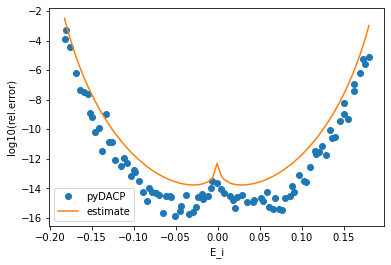

In [6]:
rel_errors = np.abs((eig_true-eig_dacp)/eig_true)
delta = 3e-16
c_i_sq = np.exp(4*filter_order*np.sqrt(a**2-eig_true**2)/a)
theoretical_errors = delta*np.exp(4*filter_order)/(np.abs(eig_true)*c_i_sq)

plt.plot(eig_true, np.log10(rel_errors), 'o', label='pyDACP')
plt.plot(eig_true, np.log10(theoretical_errors), label='estimate')
plt.xlabel('E_i')
plt.ylabel('log10(rel.error)')
plt.legend()